# 9. Dealing with Imbalanced Data in the Credit Card Fraud Detection Dataset

Importing the libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

Loading the dataset

In [3]:
credit_card_df = pd.read_csv('./datasets/creditcard.csv')

In [4]:
credit_card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Data Exploration

Check the distribution of the target variable

In [6]:
class_distribution = credit_card_df['Class'].value_counts()
print("Class Distribution:")
print(class_distribution)

Class Distribution:
0    284315
1       492
Name: Class, dtype: int64


Plot the class distribution

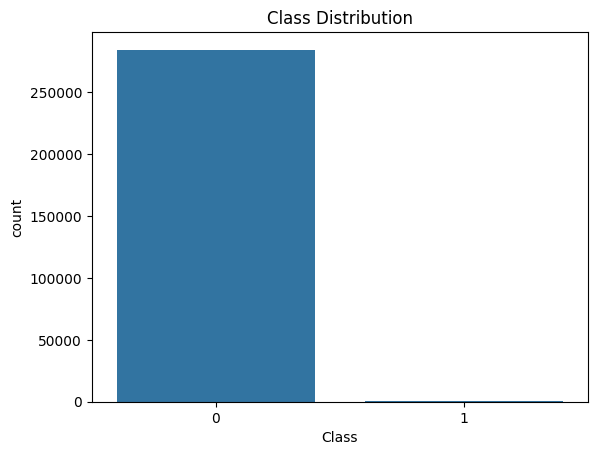

In [7]:
sns.countplot(x='Class', data=credit_card_df)
plt.title('Class Distribution')
plt.show()

# Data Preparation

Separate features and target variable

In [8]:
X = credit_card_df.drop(columns=['Class'])
y = credit_card_df['Class']

Split the data into training and testing sets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Handling Imbalanced Data

Apply SMOTE to the training data

In [13]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print("Class Distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts())

Class Distribution after SMOTE:
0    227451
1    227451
Name: Class, dtype: int64


Apply ADASYN to the training data

In [15]:
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

# Check the new class distribution
print("Class Distribution after ADASYN:")
print(pd.Series(y_train_adasyn).value_counts())

Class Distribution after ADASYN:
0    227451
1    227346
Name: Class, dtype: int64


Apply Random Undersampling to the training data

In [16]:
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# Check the new class distribution
print("Class Distribution after Random Undersampling:")
print(pd.Series(y_train_rus).value_counts())

Class Distribution after Random Undersampling:
0    394
1    394
Name: Class, dtype: int64


# Model Training and Evaluation

In [17]:
def train_and_evaluate(X_train_resampled, y_train_resampled, X_test, y_test):
    # Initialize the Logistic Regression model
    model = LogisticRegression(max_iter=1000, random_state=42)
    
    # Train the model
    model.fit(X_train_resampled, y_train_resampled)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

In [18]:
# Evaluate the model with SMOTE
print("Evaluation with SMOTE:")
train_and_evaluate(X_train_smote, y_train_smote, X_test, y_test)

# Evaluate the model with ADASYN
print("Evaluation with ADASYN:")
train_and_evaluate(X_train_adasyn, y_train_adasyn, X_test, y_test)

# Evaluate the model with Random Undersampling
print("Evaluation with Random Undersampling:")
train_and_evaluate(X_train_rus, y_train_rus, X_test, y_test)

Evaluation with SMOTE:
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.91      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.94      0.56     56962
weighted avg       1.00      0.98      0.99     56962

Confusion Matrix:
 [[55591  1273]
 [    9    89]]
Evaluation with ADASYN:
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.90      0.08        98

    accuracy                           0.96     56962
   macro avg       0.52      0.93      0.53     56962
weighted avg       1.00      0.96      0.98     56962

Confusion Matrix:
 [[54824  2040]
 [   10    88]]
Evaluation with Random Undersampling:
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96 